In [5]:
import sys
sys.path.append("..") 
from dataset.SwissImageDataset import SwissImage, unnormalize_batch, xunnormalize_batch
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.colors import ListedColormap
%load_ext autoreload
%autoreload 2
from torch.utils.data import DataLoader
from utils.transforms import Compose, MyRandomRotation90, MyRandomHorizontalFlip, MyRandomVerticalFlip
from torchvision import transforms
sys.path.append("..") 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dataset_csv =   '/home/valerie/Projects/Alps_LCC/data/split/test_dataset.csv'
   
img_dir = '/home/valerie/data/rocky_tlm/rgb/'  #'/data/xiaolong/rgb'
dem_dir = '/home/valerie/data/rocky_tlm/dem/' # /data/xiaolong/dem'
mask_dir = '/home/valerie/data/ace_Xiaolong/mask'

In [7]:
dataset = SwissImage(dataset_csv=dataset_csv,img_dir=img_dir,dem_dir=dem_dir, label_dir=mask_dir)
num_samples = 15
dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)

In [8]:
batch = next(iter(dataloader))
rgb_images, dems, segmentation_maps = batch


In [9]:
rgb_images.shape,rgb_images.mean()

(torch.Size([15, 3, 200, 200]), tensor(0.2306))

In [10]:
mean = torch.Tensor([0.5585, 0.5771, 0.5543]).unsqueeze(-1).unsqueeze(-1)
std = torch.Tensor ([0.2535, 0.2388, 0.2318]).unsqueeze(-1).unsqueeze(-1)
rgb_images = rgb_images * std +mean

In [11]:
rgb_images.shape,rgb_images.mean(), rgb_images[0,0,0,:10]

(torch.Size([15, 3, 200, 200]),
 tensor(0.6189),
 tensor([0.8980, 0.8824, 0.8941, 0.9137, 0.9137, 0.9059, 0.9137, 0.8980, 0.8824,
         0.8784]))

In [12]:
# Convert the tensors to numpy arrays
rgb_images = rgb_images.detach().cpu().numpy()*255
dems = dems.numpy()
segmentation_maps = segmentation_maps.numpy()

print ( rgb_images.max(),rgb_images.min(), rgb_images.mean(), rgb_images.shape )

255.0 1.9999999 157.81056 (15, 3, 200, 200)


In [13]:
rgb_images[0,0,0,:10]

array([229., 225., 228., 233., 233., 231., 233., 229., 225., 224.],
      dtype=float32)

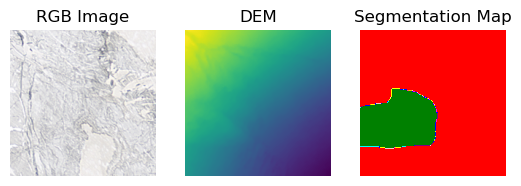

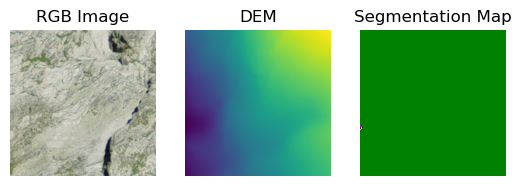

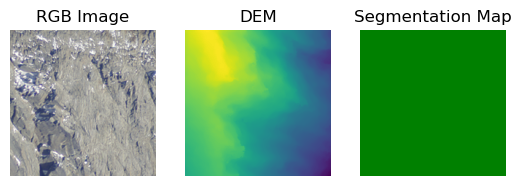

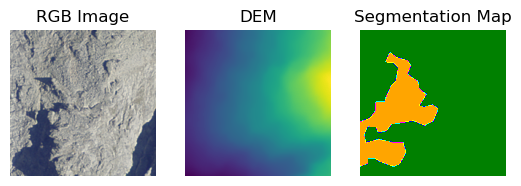

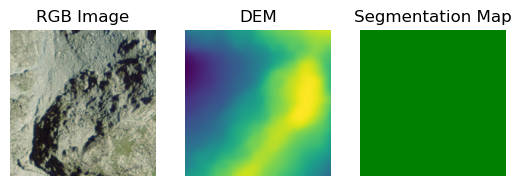

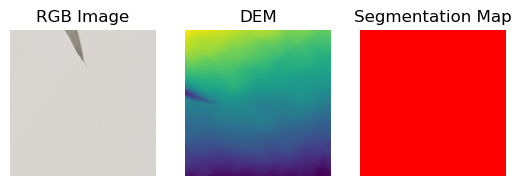

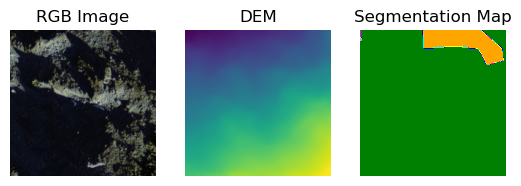

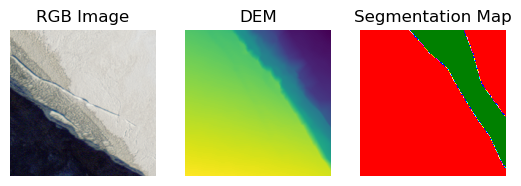

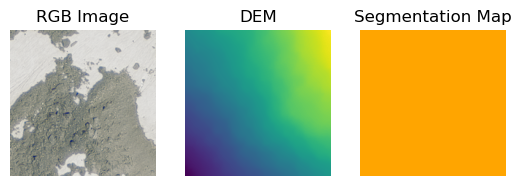

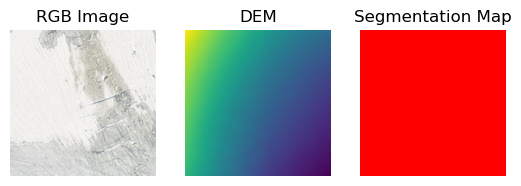

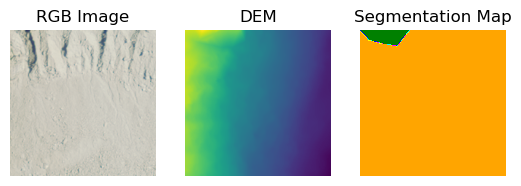

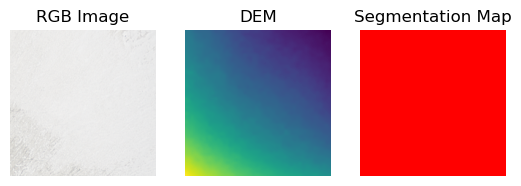

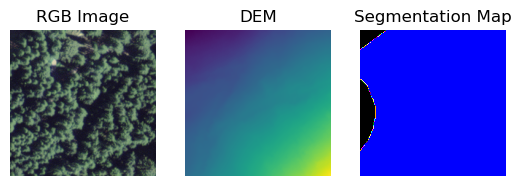

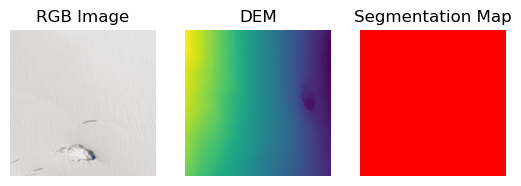

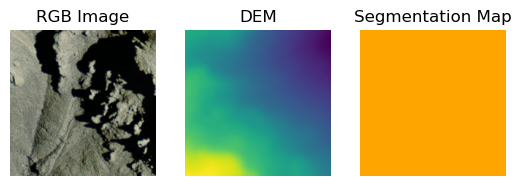

In [14]:
# Loop over the samples and plot them
colors = ['black', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink','blue','red']
cmap=ListedColormap(colors)

for i in range(num_samples):
    
    rgb_images, dems, segmentation_maps = dataset[i+100]
    rgb_images = rgb_images * std +mean
    rgb_images = rgb_images.detach().cpu().numpy()*255
    rgb  = rgb_images.astype(int)
    rgb = np.transpose(rgb)
    dem= dems.squeeze().numpy()
    label = segmentation_maps.squeeze().numpy()
    
    plt.figure()
    plt.subplot(131)
    plt.imshow(rgb)
    plt.title("RGB Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(dem, cmap='viridis')
    plt.title("DEM")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(label, cmap=cmap, vmin=0,vmax=9)
    plt.title("Segmentation Map")
    plt.axis('off')

In [15]:
rgb.shape


(200, 200, 3)

In [16]:
dems.shape,rgb_images.shape, segmentation_maps.shape

(torch.Size([1, 200, 200]), (3, 200, 200), torch.Size([1, 200, 200]))

In [17]:
batch = next(iter(dataloader))
rgb_images, dems, segmentation_maps = batch
rgb_images = unnormalize_batch(rgb_images)

# Convert the tensors to numpy arrays
rgb_images = rgb_images.numpy()
dems = dems.numpy()
segmentation_maps = segmentation_maps.numpy()

common_transform = Compose([
        MyRandomHorizontalFlip(p=0.5),
        MyRandomVerticalFlip(p=0.5),
        MyRandomRotation90(p=0.5),
        ])
        
img_transform = transforms.Compose([  transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05)  ]) 
ds = SwissImage(            dataset_csv,  img_dir,  dem_dir,  mask_dir,  common_transform = common_transform, img_transform = img_transform, )

UnboundLocalError: cannot access local variable 'rgb_images' where it is not associated with a value

In [ ]:
# Loop over the samples and plot them
colors = ['black', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink','blue','red']
cmap=ListedColormap(colors)

for i in range(5):
    ds = SwissImage( dataset_csv,  img_dir,  dem_dir,  mask_dir,  common_transform = common_transform, img_transform = img_transform, )
    
    rgb_images, dems, segmentation_maps = ds[400]
    rgb_images = unnormalize_batch(rgb_images).squeeze(0).squeeze(0)
    rgb_images = rgb_images.squeeze(0).numpy()
    dems = dems.numpy()
    segmentation_maps = segmentation_maps.squeeze(0).numpy()
   # print(rgb_images.shape,dems.shape,segmentation_maps.shape)
    
    plt.figure()
    plt.subplot(131)
    plt.imshow(rgb_images.transpose(1, 2, 0))
    plt.title("RGB Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(dems[0], cmap='viridis')
    plt.title("DEM")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(segmentation_maps, cmap=cmap)
    plt.title("Segmentation Map")
    plt.axis('off')